# Relatório de Análise VII

## Criando Agrupamentos

In [82]:
import pandas as pd

In [83]:
dados = pd.read_csv('Dados/dados_residenciais.csv', sep = ';')

In [84]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


#### Fazendo a média da coluna Valor

#### https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [85]:
dados['Valor'].mean()

5046.172821405663

#### Fazendo uma serie booleana e jogando no DataFrame dados, só ficaram os valores True

In [86]:
bairos = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairos)
dados = dados[selecao]

In [87]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Apartamento
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [88]:
dados['Bairro'].drop_duplicates() #Utilizando o drop duplicates sem o implace só para saber quais elesmentos estão em Bairro

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [89]:
grupo_bairro = dados.groupby('Bairro') #cria um objeto do tipo DataFrameGroupby do pandas

In [90]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
grupo_bairro.groups # Mostra o dicionário, onde a chave utilizada é a variável indexidadora 
                    # E os indices de onde foram encontrado esses registros

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [92]:
for bairro, dados in grupo_bairro: #Para vermos mais informações dentro deste grupo
    print((bairro))

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [93]:
for bairro, dados in grupo_bairro: #Ele cria um dataframe para cada tipo de Bairro
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [94]:
for bairro, dados in grupo_bairro: #Para vermos mais informações de cada DataFrame
    print((dados))

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
32            Apartamento  Barra da Tijuca        3      2       1   110   
35            Apartamento  Barra da Tijuca        3      1       1    72   
42     Casa de Condomínio  Barra da Tijuca        5     10       5  1600   
43            Apartamento  Barra da Tijuca        4      3       3   153   
60            Apartamento  Barra da Tijuca        4      4       4   240   
61            Apartamento  Barra da Tijuca        3      2       1   104   
64            Apartamento  Barra da Tijuca        2      1       1    88   
68          

In [95]:
for bairro, data in grupo_bairro: #Para vermos a média de Valor para cada tipo de Bairro
    print('{} -> {}'.format(bairro,data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [96]:
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [97]:
grupo_bairro['Valor'].describe().round(2) #gerando outras estatísticas

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [98]:
grupo_bairro['Valor'].aggregate(['min','max','sum']).rename(columns = {'min' : 'Mínimo', 'max' : 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [99]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Médio do Alugel')

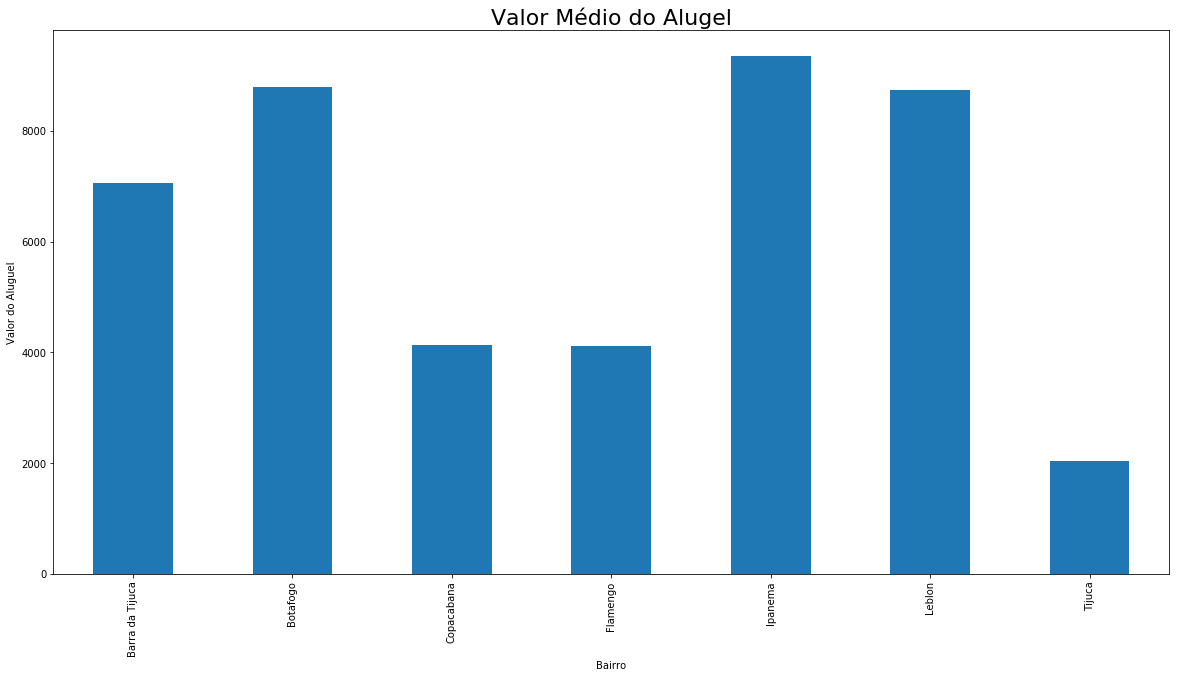

In [100]:
plt.rc('figure', figsize = (20,10))
fig = grupo_bairro['Valor'].mean().plot.bar()
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Alugel', {'fontsize' : 22})

Text(0.5, 1.0, 'Valor Médio do Alugel')

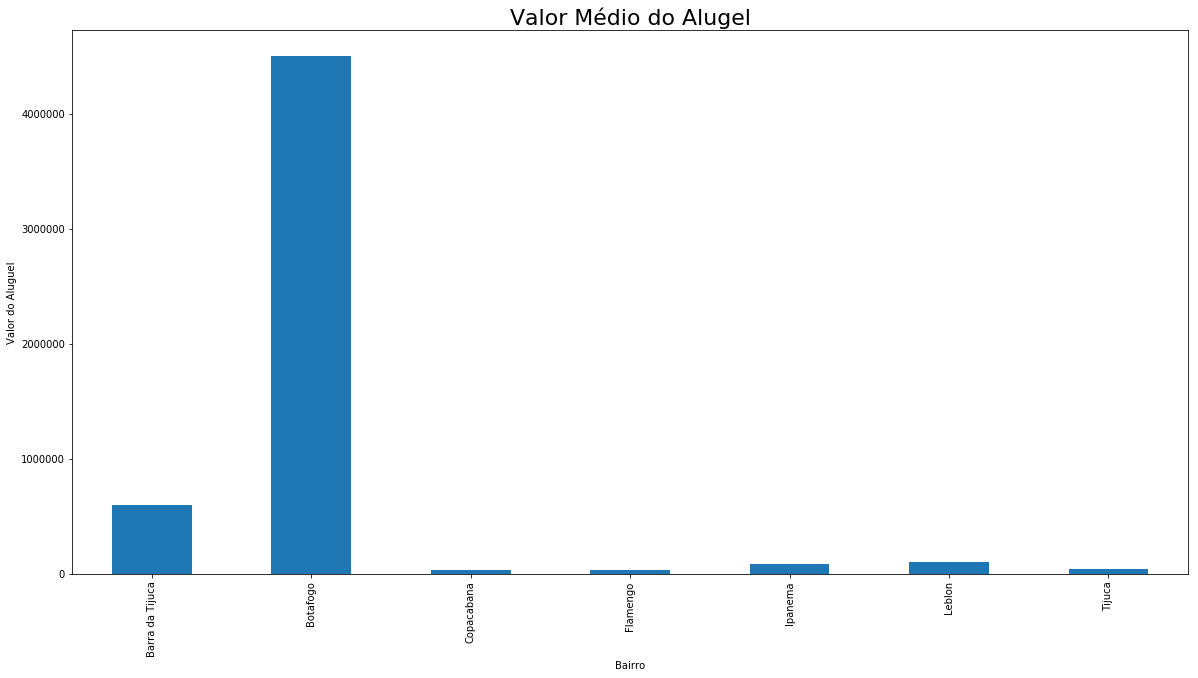

In [101]:
plt.rc('figure', figsize = (20,10))
fig = grupo_bairro['Valor'].max().plot.bar()
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Alugel', {'fontsize' : 22})